In [268]:
# Import the libraries:

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the width, height in inches.

# Read in the data

df_movies = pd.read_csv('C:\\Users\\Sowjanya KAKE\\OneDrive\\Desktop\\DAC\\Portfolio_Projects\\Python\\movies.csv')

In [269]:
# Inspecting the data.
df_movies.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [270]:
df_movies.shape

(7668, 15)

In [271]:
df_movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [272]:
df_movies.describe()

year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000

In [273]:
# checking for missing data:

for col in df_movies.columns:
    missing_data_pctg = np.mean(df_movies[col].isnull())
    print('{} - {}%'.format(col,missing_data_pctg))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [274]:
df_movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [275]:
# checking for NaN in released 

df_movies['released'].isnull().sum()

2

In [276]:
# dropping the NaN values in released

df_movies = df_movies.dropna(subset=['released'])

In [277]:
df_movies['released'].isnull().sum()

0

In [278]:
#df_movies['year_rel'] = ''
#for i in df_movies['released'].index:
#    year_str = ' '.join(re.findall(r'\d{4}', df_movies['released'][i])) # join() for converting list to string
#    df_movies['year_rel'][i]=year_str   
df_movies['yearcorrect'] = df_movies['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [321]:
df_movies.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1  3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2  3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3   205       4      4  1980      1131    7.7   221000.0       891    1416   
4   734       6      4  1980      1174    7.3   108000.0       721     352   

   star  country    budget      gross  company  runtime  yearcorrect  
0   700       46  19000000   46998772     1432    146.0         1980  
1   215       47   4500000   58853106      454    104.0         1980  
2  1161       47  18000000  538375067      949    124.0         1980  
3  1478       47   3500000   83453539     1114     88.0         1980  
4   272       47   6000000   39846344     1089     98.0         1980

In [322]:
#pd.set_option('display.max_rows', None)
df_movies[['released','yearcorrect']].head()

released  yearcorrect
0      1308         1980
1      1131         1980
2      1363         1980
3      1131         1980
4      1174         1980

In [281]:
df_movies[['budget','gross']].isnull().sum()

budget    2169
gross      187
dtype: int64

In [282]:
df_movies = df_movies.dropna(subset=['budget','gross'])

In [283]:
df_movies[['budget','gross']].isnull().sum()

budget    0
gross     0
dtype: int64

In [284]:
df_movies.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [285]:
# changing the datatypes of budget and gross to int64

df_movies['budget'] = df_movies['budget'].astype('int64') 
df_movies['gross'] = df_movies['gross'].astype('int64') 

C:\Users\Sowjanya KAKE\AppData\Local\Temp\ipykernel_37364\4254891890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['budget'] = df_movies['budget'].astype('int64')
C:\Users\Sowjanya KAKE\AppData\Local\Temp\ipykernel_37364\4254891890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['gross'] = df_movies['gross'].astype('int64')


In [286]:
df_movies.shape

(5436, 16)

In [323]:
df_movies.sort_values(by=['gross'], inplace=False, ascending=False).head()


name  rating  genre  year  released  score      votes  director  writer  \
5445   387       5      0  2009       528    7.8  1100000.0       787    1265   
7445   389       5      0  2019       138    8.4   903000.0       106     515   
3045  4923       5      6  1997       535    7.8  1100000.0       787    1265   
6663  3656       5      0  2015       530    7.8   876000.0       770    1810   
7244   390       5      0  2018       146    8.4   897000.0       106     515   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  1538       47  237000000  2847246203     1388    162.0         2009  
7445  1474       47  356000000  2797501328      987    181.0         2019  
3045  1076       47  200000000  2201647264     1388    194.0         1997  
6663   357       47  245000000  2069521700      949    138.0         2015  
7244  1474       47  321000000  2048359754      987    149.0         2018

In [324]:
df_movies.sort_values(by=['company'], inplace=False, ascending=True).head()

name  rating  genre  year  released  score    votes  director  writer  \
633   3906       4      3  1984      2499    6.1    270.0      1599    2106   
1572  1756       4      6  1989       344    5.2    677.0      1267     192   
4345   110       6      0  2003       175    6.1  46000.0       569     496   
7525  5175       5      2  2019       907    7.5  28000.0      1211    1907   
3024  3359       3      4  1996       210    6.8   5300.0      1863    2895   

      star  country    budget      gross  company  runtime  yearcorrect  
633    589       47    221000    2687148       -1    110.0         1984  
1572    55       47   8000000    1097333       -1     95.0         1989  
4345  1792       47  36000000   44350926        0    109.0         2003  
7525  1036       26  11100000  193457467        1    112.0         2020  
3024  1659       47    250000      10580        2     96.0         1997

In [289]:
df_movies['company'].value_counts()

Universal Pictures                                                 330
Columbia Pictures                                                  302
Warner Bros.                                                       299
Paramount Pictures                                                 279
Twentieth Century Fox                                              209
New Line Cinema                                                    156
Walt Disney Pictures                                               107
Touchstone Pictures                                                105
Metro-Goldwyn-Mayer (MGM)                                           99
Dreamworks Pictures                                                 75
TriStar Pictures                                                    75
Miramax                                                             66
Fox 2000 Pictures                                                   58
Summit Entertainment                                                57
Screen

In [290]:
# Checking for duplicates:

df_movies.duplicated()
df_movies.loc[df_movies.duplicated()]

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, yearcorrect]
Index: []

In [291]:
# checking duplicates with subset of columns,and  deselecteing those records:

df_movies.loc[~df_movies.duplicated(subset=['company'])].reset_index(drop=True)

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                    The Blues Brothers          R     Action   
6                                           Raging Bull          R  Biography   
7                                           Superman II         PG     Action   
8                                       The Long Riders          R  Biography   
9                                 Any Which Way You Can         PG     Action   
10                               The Gods Must Be Crazy         PG  Adventure   
11                                      Dressed to Kill          R      Crime   
12                                    Somewhere in Time         PG      Drama   
13                                               9 to 5         PG     Comedy   
14                                              The Fog          R     Horror   
15                                             Cruising          R      Crime   
16                                        Heaven's Gate          R  Adventure   
17                                  The Final Countdown         PG     Action   
18                                             Brubaker          R      Crime   
19                     Cattle Annie and Little Britches         PG      Drama   
20                                The Hollywood Knights          R     Comedy   
21                                           Motel Hell          R     Comedy   
22                                        The Stunt Man          R     Action   
23                                    Stardust Memories         PG     Comedy   
24                                 When Time Ran Out...         PG     Action   
25                                      Oh Heavenly Dog         PG     Comedy   
26                                          The Octagon          R     Action   
27                        The Last Flight of Noah's Ark          G  Adventure   
28                                               Phobia          R      Drama   
29                       An American Werewolf in London          R     Comedy   
30                                        The Evil Dead      NC-17     Horror   
31                                              Porky's          R     Comedy   
32                                  Clash of the Titans         PG     Action   
33                                            Excalibur          R  Adventure   
34                                            Mad Max 2          R     Action   
35                                   The Cannonball Run         PG     Action   
36                                                Thief          R     Action   
37                                         Time Bandits         PG  Adventure   
38                               Friday the 13th Part 2          R     Horror   
39                                   For Your Eyes Only         PG     Action   
40                                         Halloween II          R     Horror   
41                                                 Taps         PG      Drama   
42                                                 Reds         PG  Biography   
43                                The Fox and the Hound          G  Animation   
44                                     Chariots of Fire         PG  Biography   
45                                   Tarzan the Ape Man   Approved  Adventure   
46                         History of the World: Part I          R     Comedy   
47                                          The Howling          R     Horror   
48                                         Cutter's Way          R      Crime   
4

In [292]:
df_movies.shape

(5436, 16)

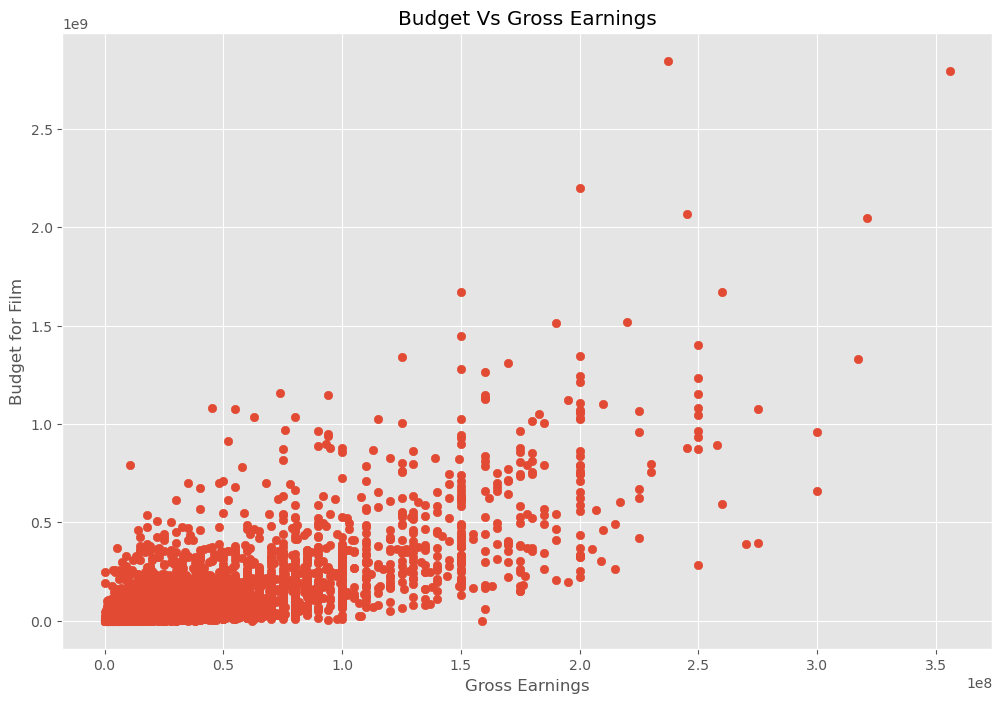

In [293]:
# scatter plot with budget Vs gross:

plt.scatter(x=df_movies['budget'], y=df_movies['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

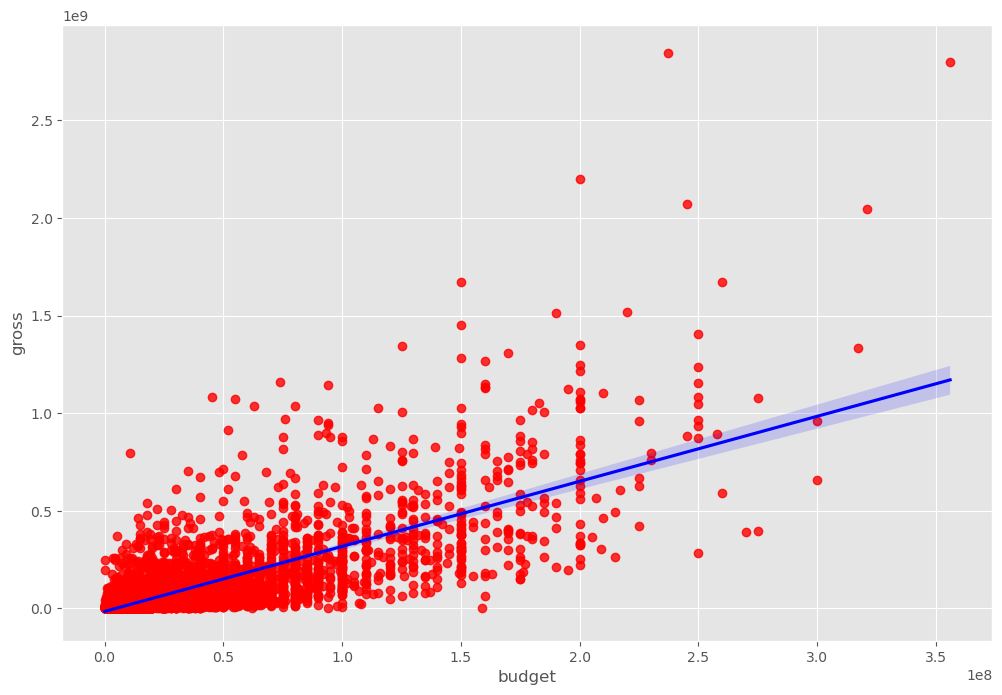

In [299]:
# plot using seaborn

sns.regplot(x='budget', y='gross', data=df_movies, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [295]:
df_movies.corr(method='pearson')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.055174  0.205758  0.327781  0.274264  0.074203   
score        0.055174  1.000000  0.473809  0.071792  0.222143  0.414580   
votes        0.205758  0.473809  1.000000  0.440021  0.614904  0.352437   
budget       0.327781  0.071792  0.440021  1.000000  0.740395  0.318595   
gross        0.274264  0.222143  0.614904  0.740395  1.000000  0.275596   
runtime      0.074203  0.414580  0.352437  0.318595  0.275596  1.000000   
yearcorrect  0.998641  0.061029  0.202883  0.320245  0.268626  0.074432   

             yearcorrect  
year            0.998641  
score           0.061029  
votes           0.202883  
budget          0.320245  
gross           0.268626  
runtime         0.074432  
yearcorrect     1.000000

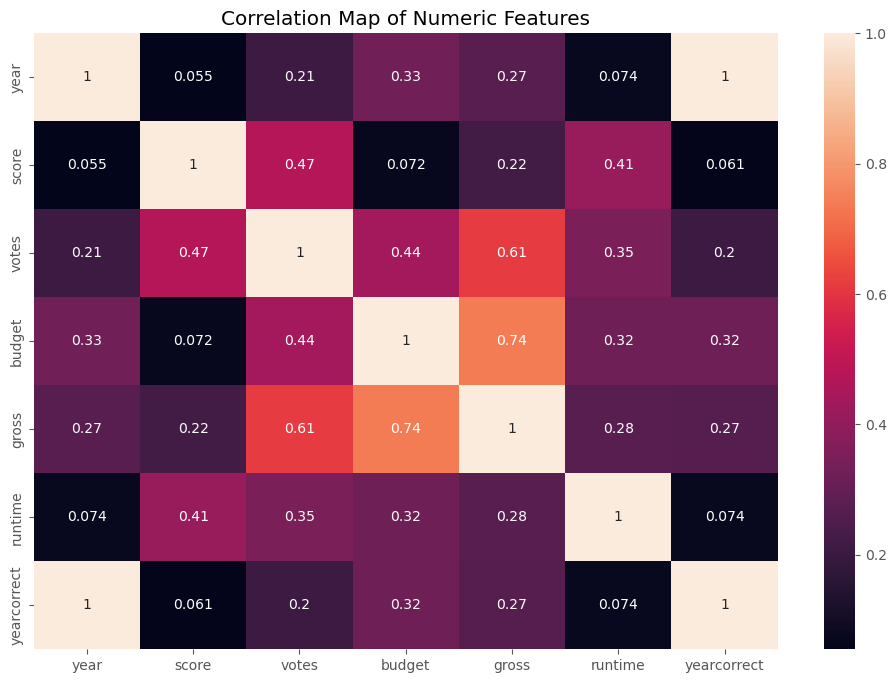

In [302]:
corr_matrix = df_movies.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Map of Numeric Features')
plt.show()

In [ ]:
# The plot shows strong positive correlation between budget and gross.
# Apart from that, votes is also showing slight positive correlation with gross.

In [ ]:
# Next we will consider the non numeric features for correlation
# Lets check company impact on gross too

In [303]:
df_movies.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrect  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

In [ ]:
# creating the numeric representation of non numeric features 

In [309]:
df_numerizedFeat = df_movies

for col in df_numerizedFeat.columns:
    if(df_numerizedFeat[col].dtype == 'object'):
       df_numerizedFeat[col] = df_numerizedFeat[col].astype('category')
       df_numerizedFeat[col] = df_numerizedFeat[col].cat.codes
        
df_numerizedFeat

name  rating  genre  year  released  score      votes  director  writer  \
0     4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1     3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2     3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3      205       4      4  1980      1131    7.7   221000.0       891    1416   
4      734       6      4  1980      1174    7.3   108000.0       721     352   
5     1513       6      9  1980      1928    6.4   123000.0      1763    3091   
6     3944       6      0  1980      1363    7.9   188000.0       976     578   
7     3134       6      3  1980       531    8.2   330000.0      1272    1259   
8     3745       4      0  1980      1350    6.8   101000.0      1611    1405   
9     4415       6      3  1980      1760    7.0    10000.0      2017     281   
10     333       4      0  1980       511    6.1    18000.0       238    2819   
11    4193       4      1  1980      2278    7.3    54000.0       819    1302   
12    3041       4      1  1980       472    5.3    30000.0      1648    1662   
13    2871       6      6  1980      2422    7.7    49000.0      1671    1657   
14    1211       6      5  1980      1174    7.1    37000.0       208     351   
15    3566       4      6  1980      2300    7.2    27000.0       849    2514   
17      67       4      4  1980       531    6.9    29000.0       335    2322   
18    4157       6      9  1980       835    6.8    66000.0       945    1489   
20     989       6      5  1980       716    6.5    20000.0      2038    3161   
21    1768       6      1  1980       118    6.8    14000.0      1310    2070   
22    4142       4      0  1980       214    6.7    22000.0       504    2969   
23    5303       4      8  1980       438    5.3    12000.0      1659    2499   
28     702       6      5  1980      1363    7.2    17000.0      1875    3109   
29     262       6      5  1980       669    6.2    22000.0      1492    2365   
33     787       4      6  1980       118    6.1      604.0      1148     675   
35    3080       6      4  1980      2162    6.2    24000.0       746    2213   
36    4259       6      4  1980      1888    6.3     4300.0       583     968   
37    2628       6      4  1980      2263    6.0    11000.0      1118    2585   
42    4750       6      0  1980      1417    7.1     9000.0      1618    1806   
46    4326       6      0  1980      1308    5.3     3900.0      1340    2390   
48    4526       4      0  1980      1928    5.1     3100.0       331    2041   
50    3661       4      4  1980      2482    7.3    22000.0      2049    3194   
51    2506       6      4  1980      2422    6.8     4500.0      1027     304   
53     693       4      0  1980      1293    6.1    11000.0       329     770   
56    5207       4      0  1980      1634    4.6     2600.0       795    1080   
57    2829       4      4  1980      1055    5.4     2400.0       916    2630   
58    4533       6      0  1980       262    5.1     5200.0       553    1823   
75    4365       1      1  1980      1403    5.8     1300.0       269     941   
77    5254       6      4  1980       262    5.9      415.0      1487    1342   
80    2983       6      6  1980      2557    4.0      546.0       971    1016   
92    1980       4      0  1981      1300    8.4   905000.0      1864    1810   
94     285       6      4  1981       315    7.5    97000.0       976    1527   
95    1304       6      0  1981      1044    7.2   131000.0       945    1489   
96    4114       2      9  1981        46    7.5   192000.0      1740    2715   
97    3043       6      4  1981      1573    6.2    40000.0       178     308   
98     604       6      5  1981      1166    7.4    47000.0       208     351   
99     863       4      0  1981      1300    6.9    42000.0       480     278   
100   1332       6      1  1981        11    7.4    59000.0       939    2973   
101   2397       6      0  1981      

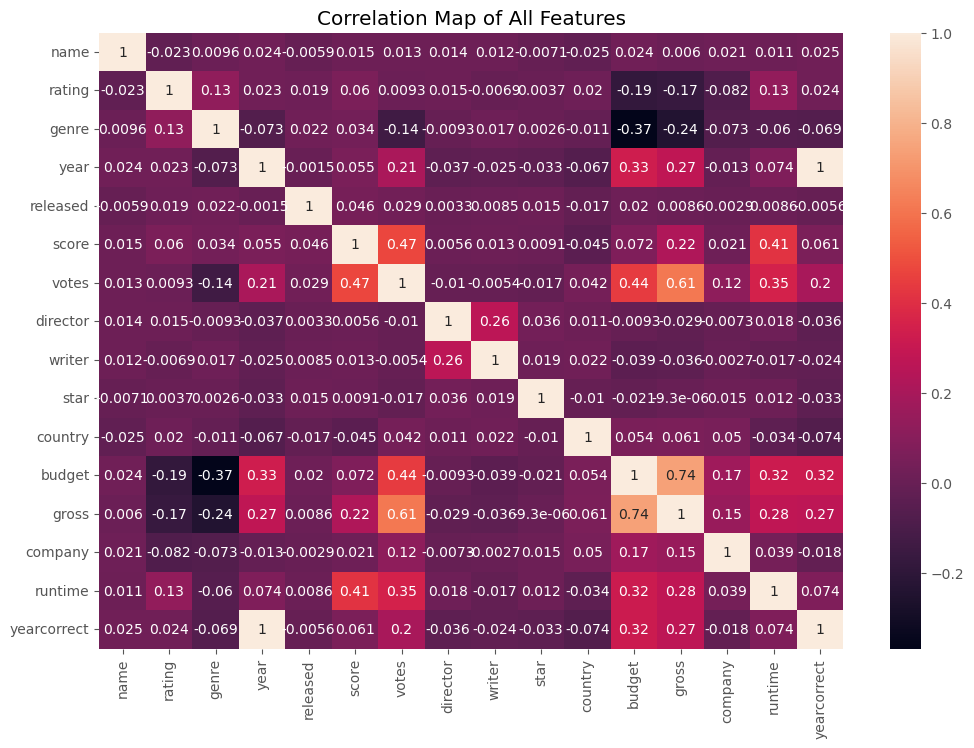

In [310]:
# lets check the numerized values with heat map

corr_matrix = df_numerizedFeat.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Map of All Features')
plt.show()

In [311]:
df_numerizedFeat.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.023013  0.009617  0.024435 -0.005896  0.014955   
rating      -0.023013  1.000000  0.128102  0.022668  0.018836  0.059550   
genre        0.009617  0.128102  1.000000 -0.073026  0.021712  0.034061   
year         0.024435  0.022668 -0.073026  1.000000 -0.001481  0.055174   
released    -0.005896  0.018836  0.021712 -0.001481  1.000000  0.046424   
score        0.014955  0.059550  0.034061  0.055174  0.046424  1.000000   
votes        0.012915  0.009255 -0.136457  0.205758  0.029029  0.473809   
director     0.013699  0.014847 -0.009303 -0.036936  0.003341  0.005573   
writer       0.011602 -0.006923  0.017500 -0.024568  0.008514  0.012860   
star        -0.007109  0.003737  0.002619 -0.032770  0.015363  0.009121   
country     -0.024555  0.020148 -0.010847 -0.066662 -0.017231 -0.044690   
budget       0.023698 -0.186892 -0.368900  0.327781  0.019888  0.071792   
gross        0.005966 -0.168814 -0.244380  0.274264  0.008614  0.222143   
company      0.021209 -0.082189 -0.073293 -0.013062 -0.002927  0.021054   
runtime      0.010800  0.133239 -0.060186  0.074203  0.008619  0.414580   
yearcorrect  0.024734  0.023634 -0.068848  0.998641 -0.005625  0.061029   

                votes  director    writer      star   country    budget  \
name         0.012915  0.013699  0.011602 -0.007109 -0.024555  0.023698   
rating       0.009255  0.014847 -0.006923  0.003737  0.020148 -0.186892   
genre       -0.136457 -0.009303  0.017500  0.002619 -0.010847 -0.368900   
year         0.205758 -0.036936 -0.024568 -0.032770 -0.066662  0.327781   
released     0.029029  0.003341  0.008514  0.015363 -0.017231  0.019888   
score        0.473809  0.005573  0.012860  0.009121 -0.044690  0.071792   
votes        1.000000 -0.010198 -0.005394 -0.017140  0.042146  0.440021   
director    -0.010198  1.000000  0.262940  0.036289  0.011108 -0.009340   
writer      -0.005394  0.262940  1.000000  0.019273  0.022153 -0.039420   
star        -0.017140  0.036289  0.019273  1.000000 -0.010135 -0.021282   
country      0.042146  0.011108  0.022153 -0.010135  1.000000  0.054372   
budget       0.440021 -0.009340 -0.039420 -0.021282  0.054372  1.000000   
gross        0.614904 -0.029366 -0.035999 -0.000009  0.060929  0.740395   
company      0.119366 -0.007337 -0.002658  0.015086  0.049559  0.171385   
runtime      0.352437  0.018082 -0.016672  0.012439 -0.033554  0.318595   
yearcorrect  0.202883 -0.036281 -0.024397 -0.033168 -0.073732  0.320245   

                gross   company   runtime  yearcorrect  
name         0.005966  0.021209  0.010800     0.024734  
rating      -0.168814 -0.082189  0.133239     0.023634  
genre       -0.244380 -0.073293 -0.060186    -0.068848  
year         0.274264 -0.013062  0.074203     0.998641  
released     0.008614 -0.002927  0.008619    -0.005625  
score        0.222143  0.021054  0.414580     0.061029  
votes        0.614904  0.119366  0.352437     0.202883  
director    -0.029366 -0.007337  0.018082    -0.036281  
writer      -0.035999 -0.002658 -0.016672    -0.024397  
star        -0.000009  0.015086  0.012439    -0.033168  
country      0.060929  0.049559 -0.033554    -0.073732  
budget       0.740395  0.171385  0.318595     0.320245  
gross        1.000000  0.150233  0.275596     0.268626  
company      0.150233  1.000000  0.038752    -0.017823  
runtime      0.275596  0.038752  1.000000     0.074432  
yearcorrect  0.268626 -0.017823  0.074432     1.000000

In [317]:
# For better view unstacking the correlation matrix: 

corr_pairs = corr_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.023013
             genre          0.009617
             year           0.024435
             released      -0.005896
             score          0.014955
             votes          0.012915
             director       0.013699
             writer         0.011602
             star          -0.007109
             country       -0.024555
             budget         0.023698
             gross          0.005966
             company        0.021209
             runtime        0.010800
             yearcorrect    0.024734
rating       name          -0.023013
             rating         1.000000
             genre          0.128102
             year           0.022668
             released       0.018836
             score          0.059550
             votes          0.009255
             director       0.014847
             writer        -0.006923
             star           0.003737
             country        0.020148
 

In [318]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368900
genre        budget        -0.368900
             gross         -0.244380
gross        genre         -0.244380
rating       budget        -0.186892
budget       rating        -0.186892
rating       gross         -0.168814
gross        rating        -0.168814
votes        genre         -0.136457
genre        votes         -0.136457
company      rating        -0.082189
rating       company       -0.082189
country      yearcorrect   -0.073732
yearcorrect  country       -0.073732
company      genre         -0.073293
genre        company       -0.073293
year         genre         -0.073026
genre        year          -0.073026
             yearcorrect   -0.068848
yearcorrect  genre         -0.068848
year         country       -0.066662
country      year          -0.066662
genre        runtime       -0.060186
runtime      genre         -0.060186
country      score         -0.044690
score        country       -0.044690
writer       budget        -0.039420
b

In [319]:
# High correlation scenarios:

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr 

gross        votes          0.614904
votes        gross          0.614904
gross        budget         0.740395
budget       gross          0.740395
year         yearcorrect    0.998641
yearcorrect  year           0.998641
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Budget and Votes have the highest correlation (0.74 and 0.612 respectively) with Gross Earnings of the Movie.
# Company has very low correlation (0.15).

In [320]:
# Negative correlation scenarios:

neg_corr = sorted_pairs[(sorted_pairs) < 0]
neg_corr

budget       genre         -0.368900
genre        budget        -0.368900
             gross         -0.244380
gross        genre         -0.244380
rating       budget        -0.186892
budget       rating        -0.186892
rating       gross         -0.168814
gross        rating        -0.168814
votes        genre         -0.136457
genre        votes         -0.136457
company      rating        -0.082189
rating       company       -0.082189
country      yearcorrect   -0.073732
yearcorrect  country       -0.073732
company      genre         -0.073293
genre        company       -0.073293
year         genre         -0.073026
genre        year          -0.073026
             yearcorrect   -0.068848
yearcorrect  genre         -0.068848
year         country       -0.066662
country      year          -0.066662
genre        runtime       -0.060186
runtime      genre         -0.060186
country      score         -0.044690
score        country       -0.044690
writer       budget        -0.039420
b

In [ ]:
# Ratings and Genre features are not impacting the Gross Earnings of the Movie with negative correlation 
# values -0.17 and -0.24 respectively.